In [1]:
import pandas as pd
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 500)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('leish_data/labs_id.csv')
tropica=pd.read_csv('leish_data/tropica.csv')
mcl=pd.read_csv('leish_data/mcl.csv')
trav_ambi=pd.read_csv('leish_data/trav_ambi.csv')

In [2]:
def data_by_word(df,word, dropna=True):
    cols=[col for col in df.columns if word in col]
    result=data[cols]
    return result.dropna(how='all')

def cols_by_word(df, word):
    return [col for col in df.columns if word in col]

def df_from_cols(df, list_of_cols):
    col_names = [item for sublist in list_of_cols for item in sublist]
    return df[col_names]

def drop_na_by_col(df, na_cols):
    return df.dropna(subset=na_cols, how='all')
    
def calc_relative_result(df,col_name):
    return df[col_name].count()/df.shape[0]

def med_percent(method_cols, med_cols, df):
    df=df_from_cols(df, [method_cols,med_cols])
    df_nonan=drop_na_by_col(df, method_cols)
    med_define_col=[col for col in df_nonan if 'Medication' in col]
    relative_amount=calc_relative_result(df_nonan,med_define_col[0])
    print (f'df shape:{df_nonan.shape}')
    print (f'relative amount:{relative_amount}')
    
def get_demog(method_cols):

    mdata=df_from_cols(data, [method_cols, demog_cols])
    mdata=drop_na_by_col(mdata, method_cols)
    m_age=mdata['Reference Event-Age at event'].mean()
    std_age=mdata['Reference Event-Age at event'].std()
    gender_count=mdata.Gender.value_counts()[1]
    gender_prop=mdata.Gender.value_counts()[1]/mdata.shape[0]
    print (f'shape: {mdata.shape}  mean age:{m_age}std   std age: {std_age}  gender count:{gender_count}   gender prop:{gender_prop} '
          )
    return 

In [3]:
demog_cols=[ 'Gender', 'Reference Event-Age at event','Reference Event: Diagnoses-Care Setting']
lab_cols=cols_by_word(data, 'Result')
lab_result_cols=cols_by_word(data, 'Numeric')
lab_inter_cols=cols_by_word(data, 'Interpretation')


diag_cols=cols_by_word(data, 'Diagnoses')
ambisome_cols=cols_by_word(data, 'ambisome')
leshcutan_cols=cols_by_word(data, 'leshcutan')
pentostam_cols=cols_by_word(data, 'pentostam')
miltefusine_cols=cols_by_word(data, 'miltefusine')

ambisome_rec_cols=cols_by_word(data, 'ambisome-rec')
ambisome_admin_cols=cols_by_word(data, 'ambisome-admin')

leshcutan_rec=cols_by_word(data, 'leshcutan-rec')
leshcutan_chornic=cols_by_word(data, 'leshcutan- c')

pentostam_rec=cols_by_word(data, 'pentostam-rec')
pentostam_admin=cols_by_word(data, 'pentostam-admin')

ambi_define='ambisome-admin-Medication'
pento_define='pentostam-admin-Medication'
milte_define='miltefusine - rec-Medication'
hosp_cols=cols_by_word(data, 'hospitalization')

## DESCRIPTIVE

In [4]:
g=get_demog(lab_cols)

shape: (522, 40)  mean age:28.842535119033528std   std age: 17.27336082910458  gender count:181   gender prop:0.34674329501915707 


## MEDICATION

In [5]:
med_types=[miltefusine_cols,ambisome_rec_cols,ambisome_admin_cols,leshcutan_rec,pentostam_rec,
           pentostam_admin]

for med_type in med_types:
    print (med_type[0])
    print(med_percent(diag_cols,med_type,data))

miltefusine - rec-Date of Documentation-Days from Reference
df shape:(1869, 11)
relative amount:0.005885500267522739
None
ambisome-rec-Date of Documentation-Days from Reference
df shape:(1869, 9)
relative amount:0.02514713750668807
None
ambisome-admin-Date Administered-Days from Reference
df shape:(1869, 9)
relative amount:0.0299625468164794
None
leshcutan-rec-Date of Documentation-Days from Reference
df shape:(1869, 10)
relative amount:0.03263777421080792
None
pentostam-rec-Medication
df shape:(1869, 9)
relative amount:0.0016051364365971107
None
pentostam-admin-Date Administered-Days from Reference
df shape:(1869, 9)
relative amount:0.060460139111824504
None


In [6]:
med_types=[miltefusine_cols,ambisome_rec_cols,ambisome_admin_cols,leshcutan_rec,pentostam_rec,
           pentostam_admin]

for med_type in med_types:
    print (med_type[0])
    print(med_percent(lab_cols,med_type,data))


miltefusine - rec-Date of Documentation-Days from Reference
df shape:(522, 44)
relative amount:0.04980842911877394
None
ambisome-rec-Date of Documentation-Days from Reference
df shape:(522, 42)
relative amount:0.08812260536398467
None
ambisome-admin-Date Administered-Days from Reference
df shape:(522, 42)
relative amount:0.1532567049808429
None
leshcutan-rec-Date of Documentation-Days from Reference
df shape:(522, 43)
relative amount:0.04980842911877394
None
pentostam-rec-Medication
df shape:(522, 42)
relative amount:0.0019157088122605363
None
pentostam-admin-Date Administered-Days from Reference
df shape:(522, 42)
relative amount:0.24904214559386972
None


## BY TIME ##

Text(0.5, 1.0, 'Patiets Diagnosed by Month')

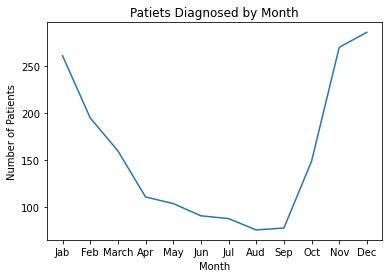

In [23]:
diag_data=df_from_cols(data, [diag_cols])
diag_data=drop_na_by_col(diag_data, diag_cols)
diag_data['date']=pd.to_datetime(diag_data['Reference Event: Diagnoses-Date of Documentation'])
diag_data['month']=diag_data.date.dt.month
g=diag_data.groupby('month')['month'].count()
plt.plot(['Jab','Feb','March','Apr','May','Jun','Jul','Aud','Sep','Oct','Nov','Dec'], g)
plt.xlabel('Month')
plt.ylabel('Number of Patients') 
plt.title('Patiets Diagnosed by Month')

Text(0.5, 1.0, 'Patiets Diagnosed by Month')

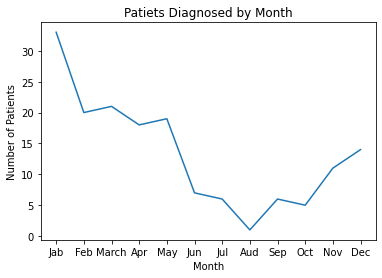

In [24]:
labs_data=df_from_cols(data, [lab_cols])
labs_data=drop_na_by_col(labs_data, lab_cols)
labs_data['date']=pd.to_datetime(labs_data['Reference Event: Lab Results Microbiology-Collection Date'])
labs_data['month']=labs_data.date.dt.month
g=labs_data.groupby('month')['month'].count()
plt.plot(['Jab','Feb','March','Apr','May','Jun','Jul','Aud','Sep','Oct','Nov','Dec'], g)
plt.xlabel('Month')
plt.ylabel('Number of Patients') 
plt.title('Patiets Diagnosed by Month')

In [25]:
labs_data=df_from_cols(data, [lab_cols])
labs_data=drop_na_by_col(labs_data, lab_cols)

## hospitalization

In [26]:
hosp_data=df_from_cols(data, [diag_cols, hosp_cols])
hosp_data=drop_na_by_col(hosp_data, diag_cols)

hosp_data=hosp_data.dropna(subset=['hospitalization-Hospital Length of Stay'])
print(hosp_data['hospitalization-Hospital Length of Stay'].mean())
print(hosp_data['hospitalization-Hospital Length of Stay'].std())

5.55974377309876
10.963651507091296


In [27]:
hosp_data=df_from_cols(data, [lab_cols, hosp_cols])
hosp_data=drop_na_by_col(hosp_data, lab_cols)

hosp_data=hosp_data.dropna(subset=['hospitalization-Hospital Length of Stay'])
print(hosp_data['hospitalization-Hospital Length of Stay'].mean())
print(hosp_data['hospitalization-Hospital Length of Stay'].std())

6.4794624701359975
7.669510434591003


In [28]:
hosp_data.shape

(54, 42)

In [47]:
data.shape

(2123, 137)

## tropica and mdclone

In [11]:
rel_cols=[demog_cols,lab_inter_cols,lab_result_cols,ambisome_admin_cols,pentostam_admin,tropica.columns ]
merged=data.merge(tropica, left_on='Patient ID',right_on='ת״ז', how='inner')
rel_merged=df_from_cols(merged, rel_cols)
rel_merged.shape

(124, 112)

AMBI

In [30]:
ambi=rel_merged[rel_merged.treatment==1]
ambi.total_dose=[dose.replace("mg/kg","") for dose in ambi.total_dose]
ambi.total_dose=[dose.replace(" ","") for dose in ambi.total_dose]
ambi.total_dose=[dose.replace("אין","") for dose in ambi.total_dose]

ambi.total_dose=[float(dose) if dose!= "" else np.nan for dose in ambi.total_dose ]
ambi=ambi.dropna(subset=['total_dose'])
ambi.shape

(69, 112)

In [13]:
cut_off_dose=30

ambi['dose_bool']=[1 if dose>cut_off_dose else 0 for dose in ambi.total_dose]
ambi['dose_bool'].value_counts()

0    60
1     9
Name: dose_bool, dtype: int64

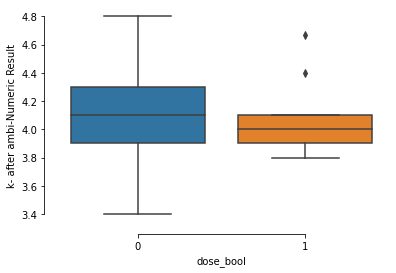

In [21]:
sns.boxplot(x="dose_bool", y="k- after ambi-Numeric Result",
           
            data=ambi)
sns.despine(offset=10, trim=True)

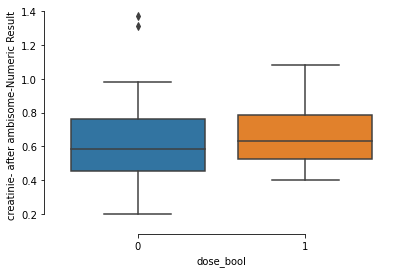

In [27]:
sns.boxplot(x="dose_bool", y="creatinie- after ambisome-Numeric Result",
           
            data=ambi)
sns.despine(offset=10, trim=True)

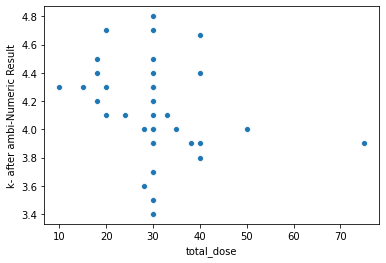

In [44]:
sns.scatterplot(data=ambi, x="total_dose", y="k- after ambi-Numeric Result")


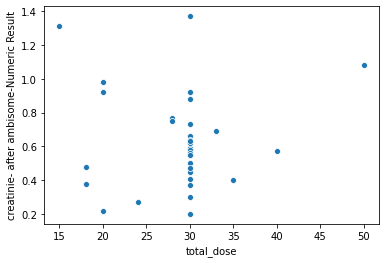

In [46]:
sns.scatterplot(data=ambi, x="total_dose", y="creatinie- after ambisome-Numeric Result")


PENTOSTAM

In [72]:
pento=rel_merged[rel_merged.treatment==0]
pento[lab_result_cols].count()

lab-results-Numeric Result                   0
creatinie- after ambisome-Numeric Result     9
k- after ambi-Numeric Result                11
ast after pento-Numeric Result              36
alt after pento-Numeric Result              36
alkp after pento-Numeric Result             36
ggt after pento-Numeric Result              18
amylase after pento-Numeric Result          36
lipase after pento-Numeric Result           36
dtype: int64

In [79]:
pento[pento_define].count()

37

In [29]:
pento=rel_merged[rel_merged.treatment==0]
pento.total_dose=[dose.replace("mg/kg","") for dose in pento.total_dose]
pento.total_dose=[dose.replace(" ","") for dose in pento.total_dose]
pento.total_dose=[dose.replace("אין","") for dose in pento.total_dose]

pento.total_dose=[float(dose) if dose!= "" else np.nan for dose in pento.total_dose ]
pento=pento.dropna(subset=['total_dose'])
pento.shape

(42, 112)

In [75]:
pento.total_dose.count()

47

In [34]:
cut_off_dose=400

pento['dose_bool']=[1 if dose>cut_off_dose else 0 for dose in pento.total_dose]
pento['dose_bool'].value_counts()

0    35
1     7
Name: dose_bool, dtype: int64

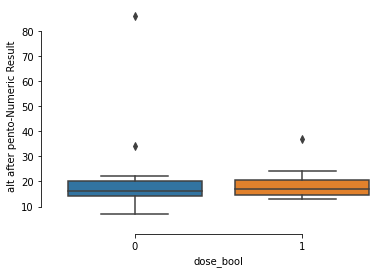

In [36]:
sns.boxplot(x="dose_bool", y="alt after pento-Numeric Result",
           
            data=pento)
sns.despine(offset=10, trim=True)

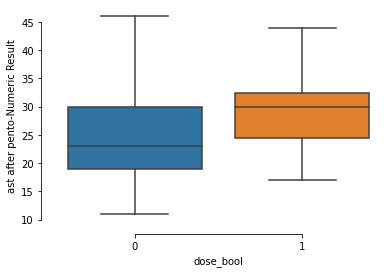

In [37]:
sns.boxplot(x="dose_bool", y="ast after pento-Numeric Result",
           
            data=pento)
sns.despine(offset=10, trim=True)

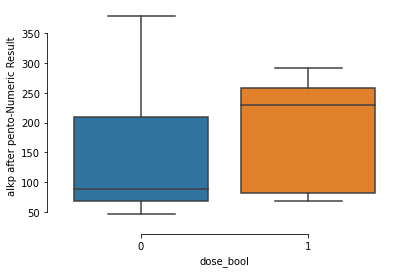

In [38]:
sns.boxplot(x="dose_bool", y="alkp after pento-Numeric Result",
           
            data=pento)
sns.despine(offset=10, trim=True)

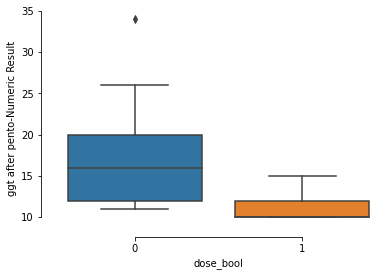

In [39]:
sns.boxplot(x="dose_bool", y="ggt after pento-Numeric Result",
           
            data=pento)
sns.despine(offset=10, trim=True)

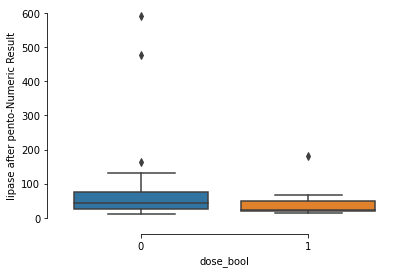

In [40]:
sns.boxplot(x="dose_bool", y="lipase after pento-Numeric Result",
           
            data=pento)
sns.despine(offset=10, trim=True)

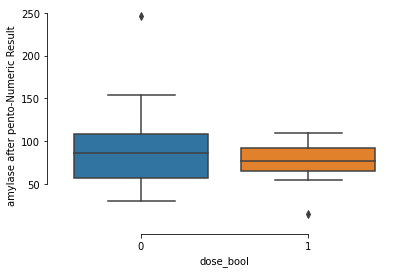

In [41]:
sns.boxplot(x="dose_bool", y="amylase after pento-Numeric Result",
           
            data=pento)
sns.despine(offset=10, trim=True)

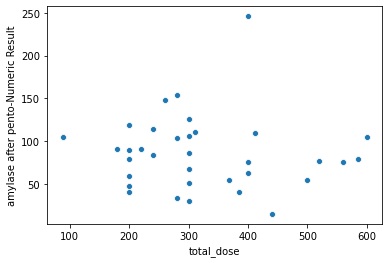

In [42]:
sns.scatterplot(data=pento, x="total_dose", y="amylase after pento-Numeric Result")


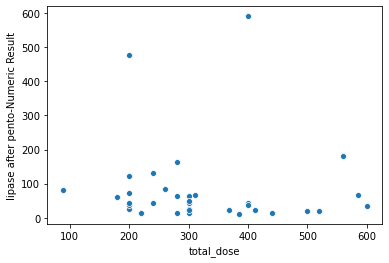

In [43]:
sns.scatterplot(data=pento, x="total_dose", y="lipase after pento-Numeric Result")


## TRAVELER

In [43]:
trav_pento=pd.read_csv('leish_data/trav_pento.csv')

trav_pento['ת.ז']=[str(ids).replace("nan","0") for ids in trav_pento['ת.ז']]

trav_pento['ת.ז']=[int(str(ids).replace("-","")) for ids in trav_pento['ת.ז']]

trav_cols=[demog_cols,lab_inter_cols,lab_result_cols,ambisome_admin_cols,pentostam_admin,trav_pento.columns ]
merged=data.merge(trav_pento, left_on='Patient ID',right_on='ת.ז', how='inner')
trav_merged=df_from_cols(merged, trav_cols)
trav_merged.shape

(1, 83)

In [39]:
trav_pento['ת.ז']

0      66079856
1      40354656
2      42827576
3      17882481
4             0
5      25346560
6      38596946
7      32206138
8      43393529
9     111877986
10     28139228
11     40335267
12     31199300
13     40183923
14     32879421
15     40649048
16     27950492
17     33481888
18     32907180
19     11028578
20     40309833
21     17903907
22     52705761
23     33854845
24     40686081
25     31775989
26       339148
27     35815745
28     32865552
29     33985003
30     33269358
31     34143214
32            0
33            0
34            0
35            0
36            0
37            0
38            0
39            0
40            0
41            0
42            0
43     25063082
44     36066397
Name: ת.ז, dtype: int64